# Pymaceuticals Inc.
---

### Analysis

- Capomulin performed extremely well in this experiment, boasting the second lowest Mean Tumor Volume, Median Tumor Volume, Tumor Volume Variance, Tumor Volume Standard Deviation, and Tumor Volume Standard Error. It was only second to Ramican in all statistics. The data set provided was very balanced, with a near equal amount of male and female mice, with there being very few outliers in terms of tumor size among Capomulin and other competing treaments. It was discovered, however, that the volume of the tumor is strongly correlated to the weight of the mouse that was being tested. Further analysis will be required in determining if Capomulin was very effective, or if the data set was skewed towards Capomulin being tested primarily on lighter mice, resulting in a lower mean and median. Also, as seen in mouse l509, after around 35 days of Capomulin treatment, the size of the tumor began to increase again. Further analysis with longer treatment periods may be necessary in examining long-term Capomulin effects.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# help from https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html
mice_counts = df.groupby(by=["Mouse ID", "Timepoint"]).value_counts()
duplicate_mice_ids = mice_counts.loc[mice_counts > 1].index.get_level_values("Mouse ID").unique()
duplicate_mice_ids

Index(['g989'], dtype='object', name='Mouse ID')

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
for i in duplicate_mice_ids:
    print(df.loc[df["Mouse ID"] == i].head())

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107     g989          0           45.000000                 0     Propriva   
137     g989          0           45.000000                 0     Propriva   
329     g989          5           48.786801                 0     Propriva   
360     g989          5           47.570392                 0     Propriva   
620     g989         10           51.745156                 0     Propriva   

        Sex  Age_months  Weight (g)  
107  Female          21          26  
137  Female          21          26  
329  Female          21          26  
360  Female          21          26  
620  Female          21          26  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for i in duplicate_mice_ids:
    df = df.loc[df["Mouse ID"] != i]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_groups = df.groupby(by="Drug Regimen")["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_means = drug_regimen_groups.mean()
drug_regimen_medians = drug_regimen_groups.median()
drug_regimen_var = drug_regimen_groups.var(ddof=0)
drug_regimen_std = drug_regimen_groups.std(ddof=0)
drug_regimen_sem = drug_regimen_groups.sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_means,
    "Median Tumor Volume": drug_regimen_medians,
    "Tumor Volume Variance": drug_regimen_var,
    "Tumor Volume Std. Dev.": drug_regimen_std,
    "Tumor Volume Std Err.": drug_regimen_sem
})
drug_regimen_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# code written with help from: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
drug_regimen_agg = df.groupby(by="Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

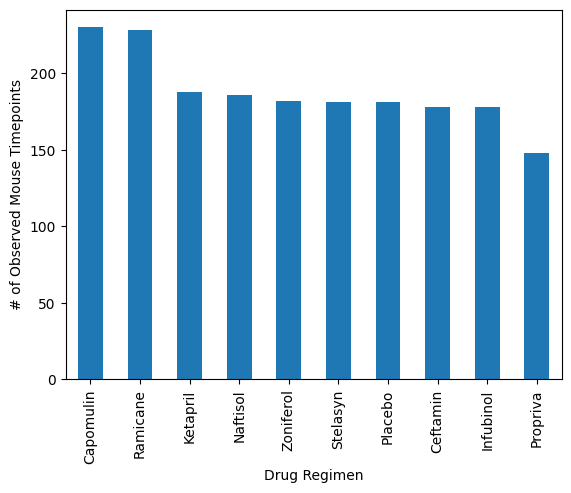

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_groups.count().sort_values(ascending=False).plot(kind="bar", ylabel="# of Observed Mouse Timepoints")
plt.show()

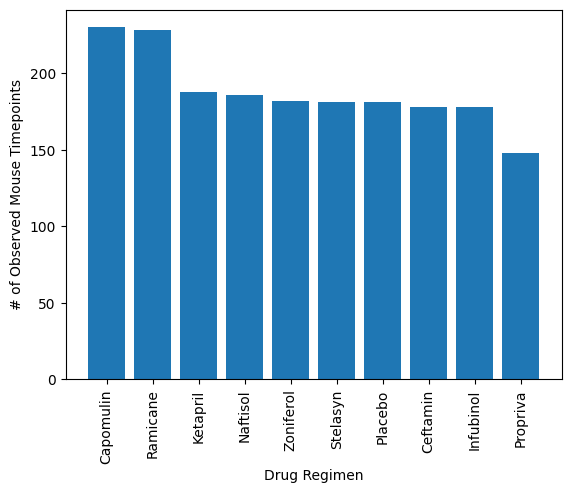

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts_sorted = drug_regimen_groups.count().sort_values(ascending=False)
plt.bar([i for i in range(len(drug_regimen_counts_sorted))], drug_regimen_counts_sorted)
plt.xticks([i for i in range(len(drug_regimen_counts_sorted))], labels=drug_regimen_counts_sorted.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

248


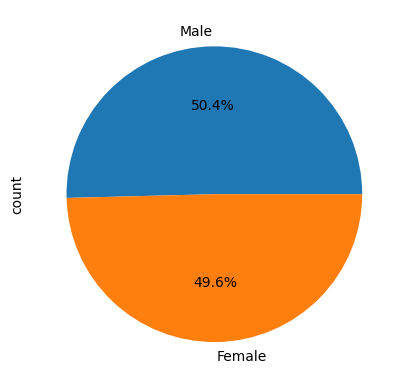

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# create new df that has all mice at timepoint 0, ensuring that there is only one timepoint for each mouse
mice_at_time_0 = df.loc[df["Timepoint"] == 0]

# check count, ensuring that it is the same number of unique mice as before (248)
print(mice_at_time_0["Mouse ID"].nunique())

# group this new df by gender and get counts. sort them, just so pie chart looks the same as that in starter code
mice_at_time_0_gender_counts = mice_at_time_0.groupby(by="Sex")["Mouse ID"].count().sort_values(ascending=False)

# Make the pie chart
# written with help from: https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
mice_at_time_0_gender_counts.plot.pie(ylabel="count", autopct="%1.1f%%")
plt.show()


248


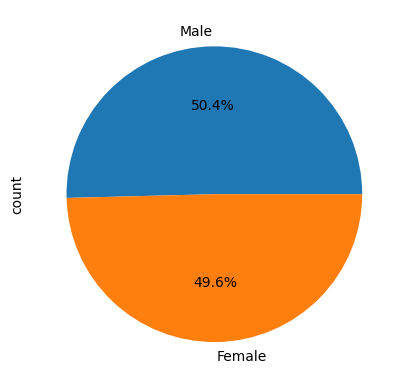

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# create new df that has all mice at timepoint 0, ensuring that there is only one timepoint for each mouse
mice_at_time_0 = df.loc[df["Timepoint"] == 0]

# check count, ensuring that it is the same number of unique mice as before (248)
print(mice_at_time_0["Mouse ID"].nunique())

# group this new df by gender and get counts. sort them, just so pie chart looks the same as that in starter code
mice_at_time_0_gender_counts = mice_at_time_0.groupby(by="Sex")["Mouse ID"].count().sort_values(ascending=False)

# Make the pie chart
plt.pie(mice_at_time_0_gender_counts, labels=mice_at_time_0_gender_counts.index, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse with specific treatment regimen
max_timepoints = df.groupby(by="Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints_only = pd.merge(df, max_timepoints, on=["Mouse ID", "Timepoint"])
max_timepoints_only


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_type = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_type:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = max_timepoints_only.loc[max_timepoints_only["Drug Regimen"] == treatment]
    quartiles = data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    # add subset
    tumor_vol_data.append(data["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    iqr = quartiles[0.75] - quartiles[0.25]
    print(f"{treatment}'s potential outliers: {data.loc[(data['Tumor Volume (mm3)'] > quartiles[0.75] + 1.5*iqr) | (data['Tumor Volume (mm3)'] < quartiles[0.25] - 1.5*iqr)]['Tumor Volume (mm3)']}")

# use for loop to put all Tumor Volume data from specified treatements into single dataframe
tumor_vol_data_df = pd.DataFrame()
for i in range(len(treatment_type)):
    tumor_vol_data_df[treatment_type[i]] = tumor_vol_data[i].reset_index(drop=True)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


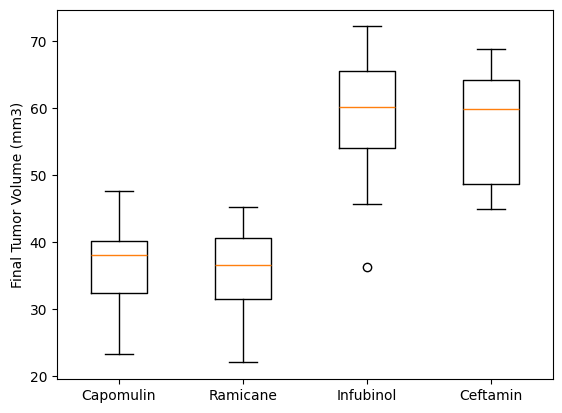

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_df)
plt.xticks([i+1 for i in range(len(treatment_type))], labels=treatment_type)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

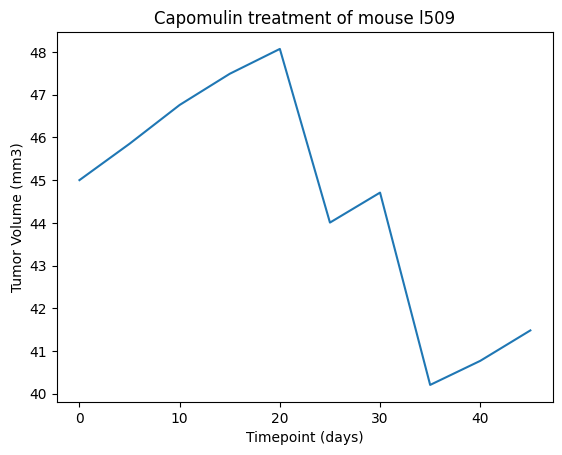

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# get data for Mouse l509 from original df
mouse_l509 = df.loc[df["Mouse ID"] == "l509"]

plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

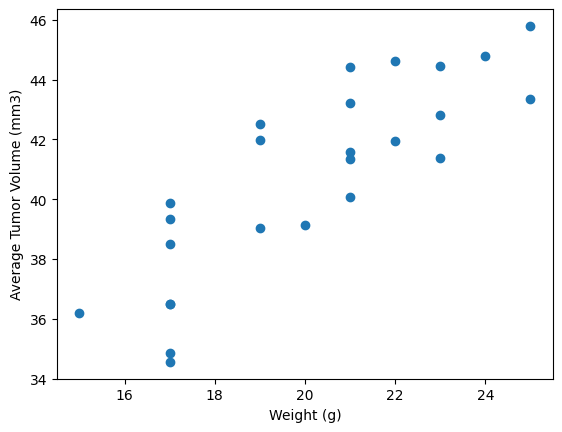

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = df.loc[df["Drug Regimen"] == "Capomulin"].groupby(by="Mouse ID")

# get x coordinate for each mouse. Assuming that each mouse's weight remained the same, the mean of the weight column for each mouse
# returns the same value as the weight
x = capomulin_mice["Weight (g)"].mean()

# get y coordinate for each mouse
y = capomulin_mice["Tumor Volume (mm3)"].mean()


# create scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


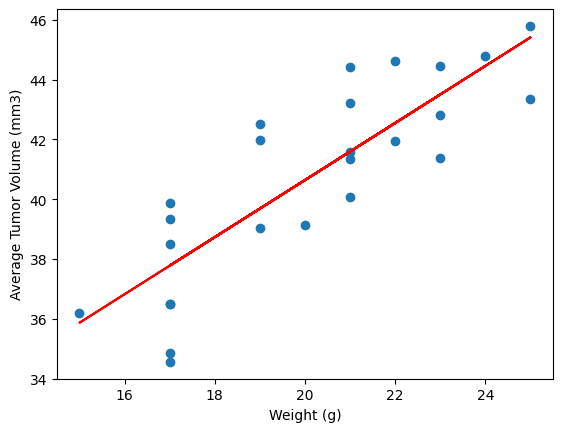

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x, y)[0], 2)}")

# calculating linear regression analysis
slope, intercept, *_ = st.linregress(x, y)
fit_line = slope * x + intercept

# plot scatter plot and regression line
plt.scatter(x, y)
plt.plot(x, fit_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()